In [294]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/usr/local/opt/libomp/lib'
import joblib

# for loading and manipulating data
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## for model building
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

##models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import r2_score, mean_absolute_error


NameError: name '__file__' is not defined

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('/Users/binit/PycharmProjects/ML_AIT_A1/projectA1/data/Cars.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [7]:
# General understanding of data as to see number of rows, min, max 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


In [8]:
# feature types all of them are object we need to convert numerical to float or integer 
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [9]:
df['seller_type'].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

In [10]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

In [11]:
df1 = df.copy()

In [12]:
df1['brand'] = df1['name'].str.split().str[0]

In [13]:
df1['model'] = df1['name'].str.split().str[1:].str.join(' ')

In [14]:
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift VXI BSIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0,Hyundai,i20 Magna
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0,Hyundai,Verna CRDi SX
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift Dzire ZDi
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0,Tata,Indigo CR4


In [15]:
#dropping the rows having fuel as CNG and LPG
df1 = df1[~df1['fuel'].isin(['LPG','CNG'])]

In [ ]:
# removing string from the value and changing the data type from object to float
df1['mileage']=df1['mileage'].str.split().str[0].astype('float')

In [ ]:
df1['engine'] = df1['engine'].str.split().str[0].astype('float')

In [ ]:
df1['max_power'] = df1['max_power'].str.split().str[0].astype('float')

In [ ]:
df1.drop(columns=['torque'], inplace=True)

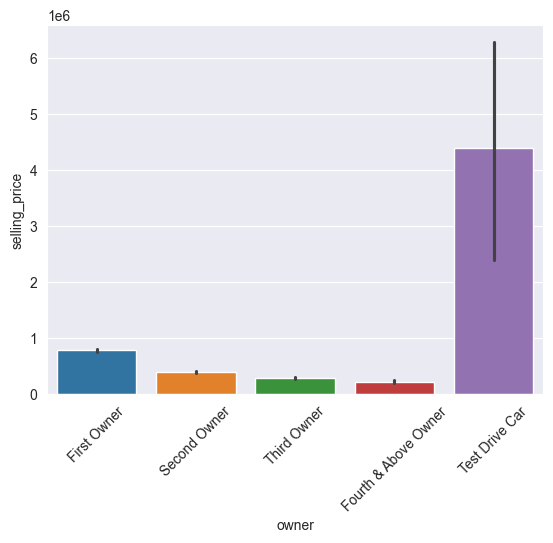

In [207]:
plt.xticks(rotation=45)
sns.barplot(x='owner', y='selling_price', data=df1, hue='owner' )
plt.show()

In [20]:
##Dropping rows having test drive as this have just 5 cars with selling price very high so can be considered outlier
df1 = df1[~(df1['owner']=='Test Drive Car')]

In [21]:
df1['owner'].value_counts()

owner
First Owner             5238
Second Owner            2073
Third Owner              547
Fourth & Above Owner     170
Name: count, dtype: int64

In [22]:
df1['owner'].map({'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth Owner':4}).astype('int32')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [23]:
df1['owner'].dtypes

dtype('O')

In [24]:
df1.drop(columns=['name'], inplace=True)

In [25]:
columns_to_move = ['brand','model']
df1 = df1[columns_to_move + [col for col in df1.columns if col not in columns_to_move]]

In [26]:
df1['owner'] = df1['owner'].map({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth Owner': 4}).fillna(0).astype('int32')

In [27]:
df1['owner'] = df1['owner'].replace(0, 4)

In [28]:
df1

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   model          8028 non-null   object 
 2   year           8028 non-null   int64  
 3   selling_price  8028 non-null   int64  
 4   km_driven      8028 non-null   int64  
 5   fuel           8028 non-null   object 
 6   seller_type    8028 non-null   object 
 7   transmission   8028 non-null   object 
 8   owner          8028 non-null   int32  
 9   mileage        7814 non-null   float64
 10  engine         7814 non-null   float64
 11  max_power      7820 non-null   float64
 12  seats          7814 non-null   float64
dtypes: float64(4), int32(1), int64(3), object(5)
memory usage: 846.7+ KB


In [30]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,8028.0,2013.815521,4.030836,1983.0,2011.00,2015.0,2017.00,2020.0
selling_price,8028.0,640393.654210,802701.548723,29999.0,260000.00,450000.0,680000.00,10000000.0
km_driven,8028.0,69773.140259,56644.187102,1000.0,35000.00,60000.0,98000.00,2360457.0
owner,8028.0,1.458022,0.715283,1.0,1.00,1.0,2.00,4.0
mileage,7814.0,19.391962,4.001972,0.0,16.78,19.3,22.32,42.0
engine,7814.0,1462.914640,504.759742,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7820.0,91.819726,35.804513,0.0,68.85,82.4,102.00,400.0
seats,7814.0,5.421551,0.963125,2.0,5.00,5.0,5.00,14.0


In [31]:
cat_col = df1.select_dtypes(include='object').columns.tolist()
num_col = df1.select_dtypes(include='number').columns.tolist()

In [32]:
num_col

['year',
 'selling_price',
 'km_driven',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'seats']

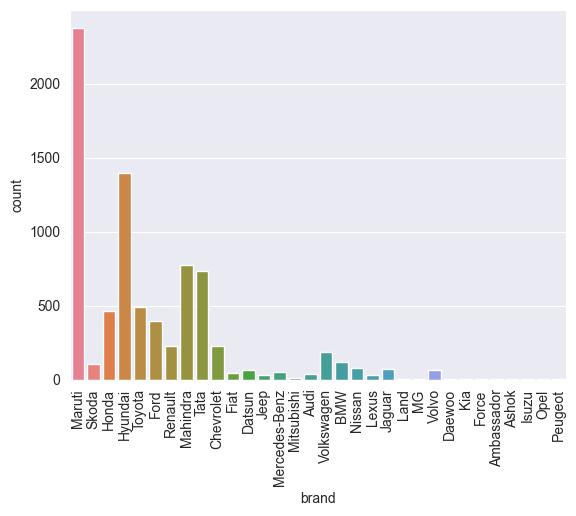

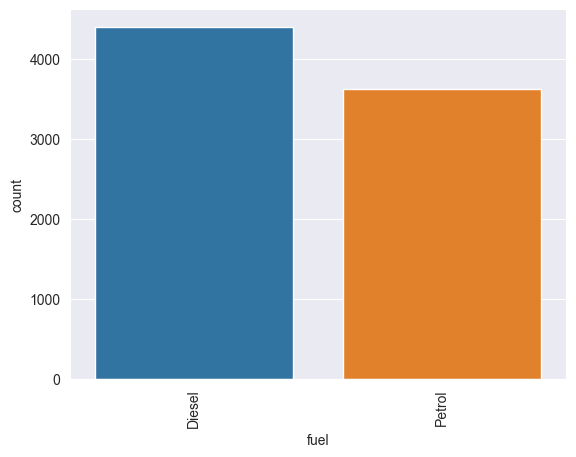

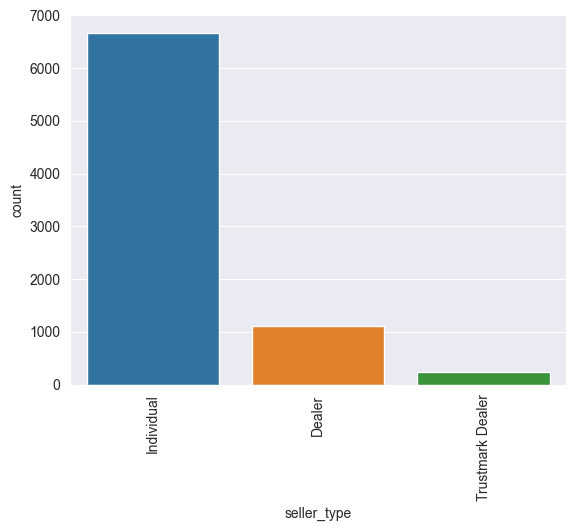

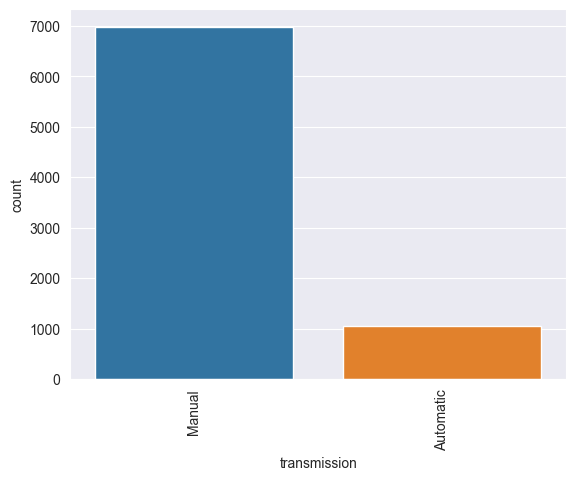

In [221]:
for col in cat_col:
    if col != 'model':
        plt.xticks(rotation=90)
        sns.countplot(x=col, data=df1, hue=col)
        plt.show()

# we can see we have too many marutis in our data sets

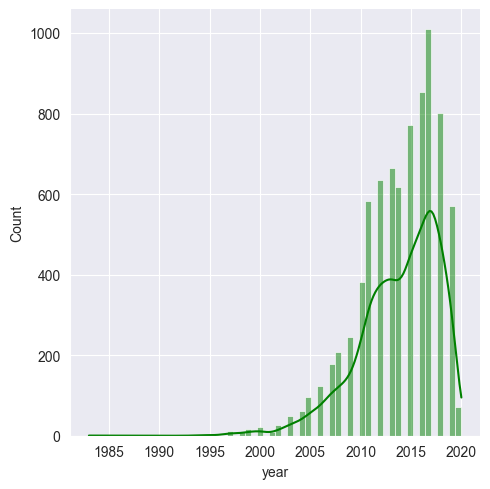

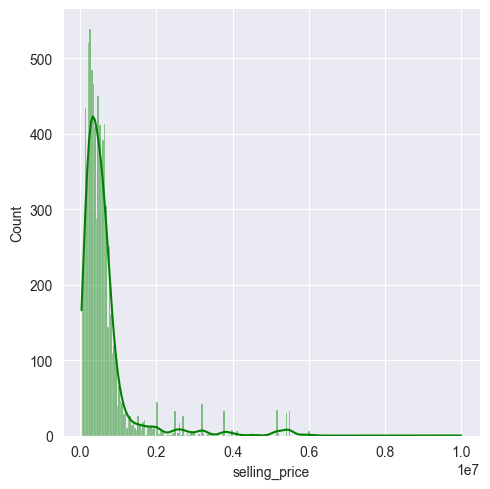

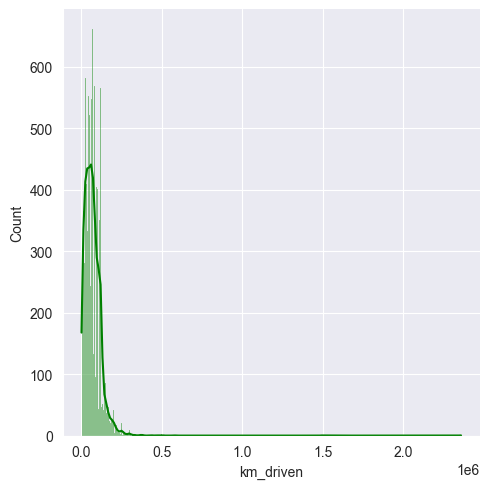

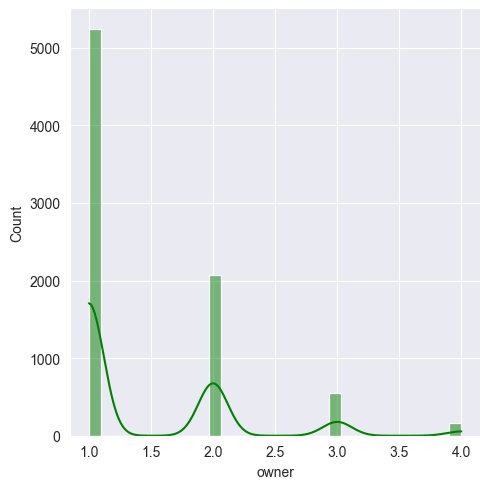

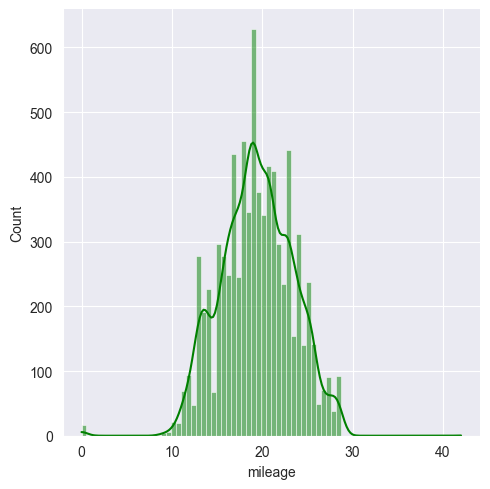

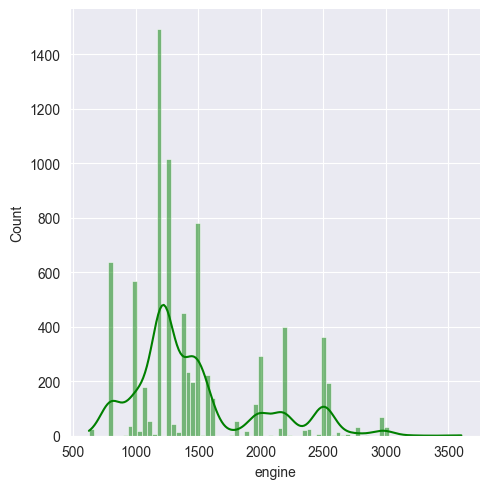

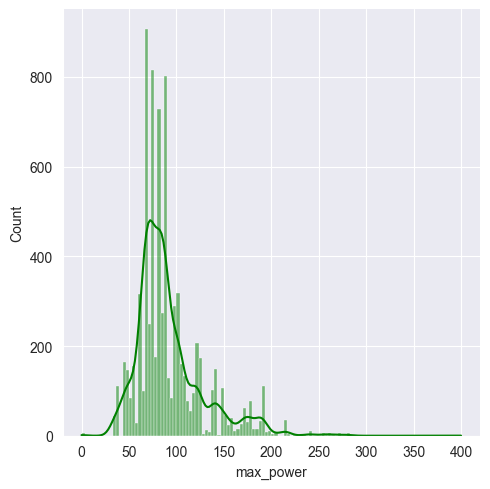

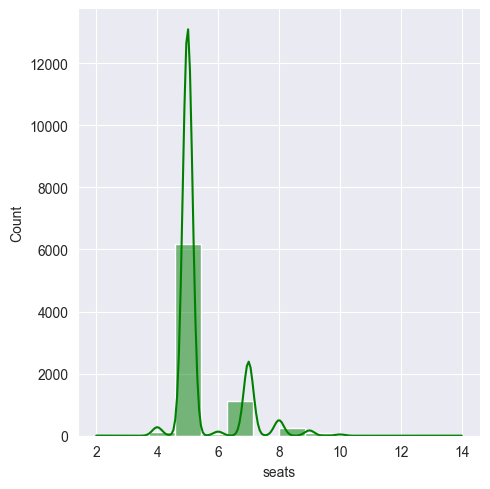

In [222]:
for col in num_col:
    sns.displot(x=col, data=df1, kde=True, color='green')
    plt.show()

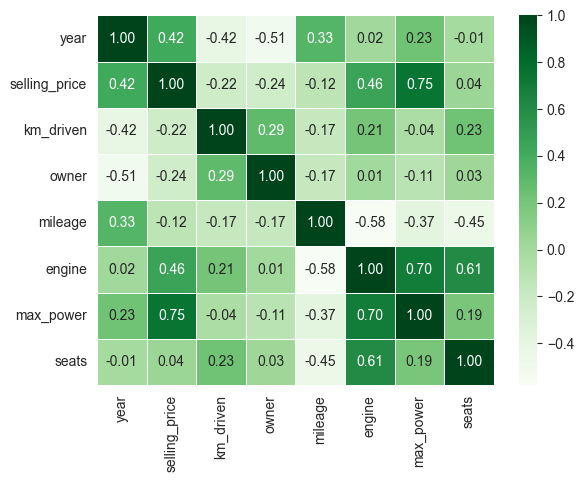

In [223]:
sns.heatmap(df1[num_col].corr(), annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.show()
## Selling price positive correlation with max_power is very high and also year, engine seems to have correlation
## A very negative correlation between selling price and km_driven/mileage

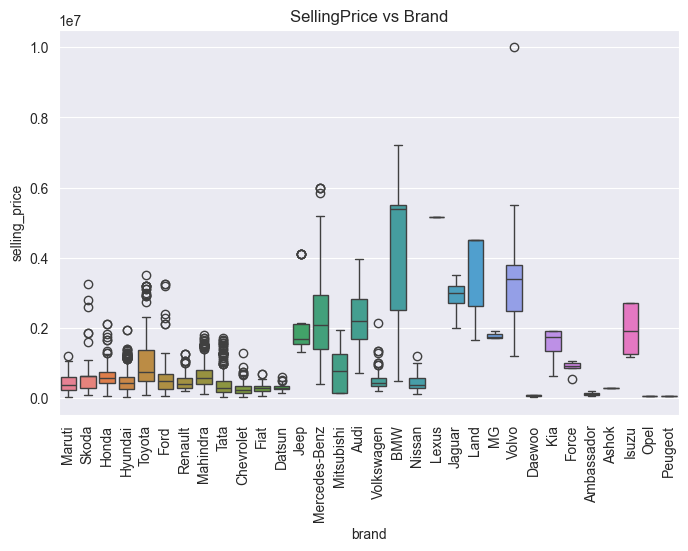

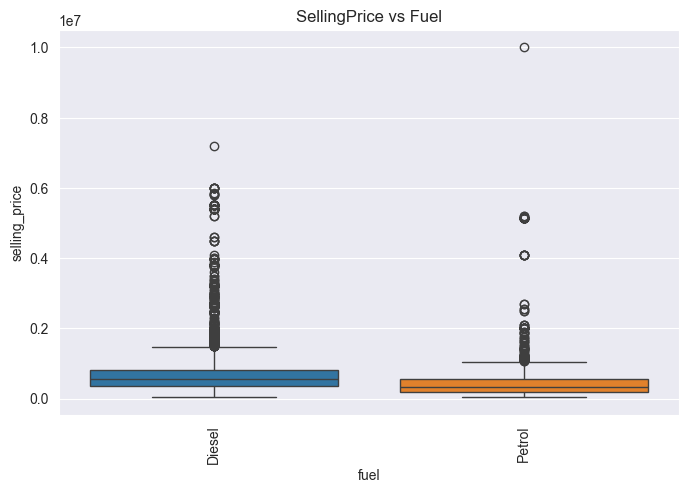

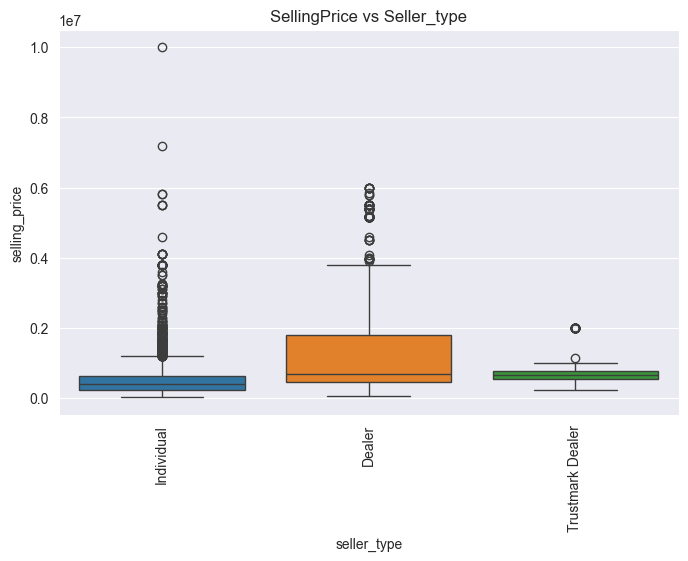

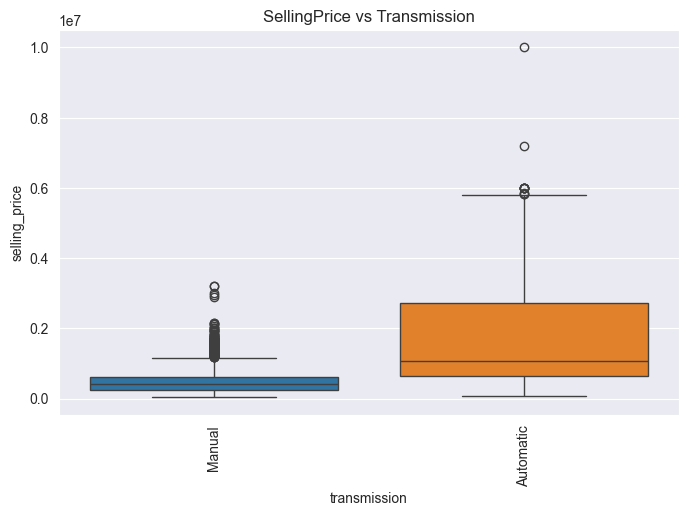

In [224]:
# trying to figure out outlier of all categorical columns in terms of target variable i.e. selling_price
for col in cat_col:
    if col != 'model':
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=col, y='selling_price', data=df1, hue=col)
        plt.title(f"SellingPrice vs {col.capitalize()}")
        plt.xticks(rotation=90)
    plt.show()
    
## we can see higher mean selling_price for car like BMW, 

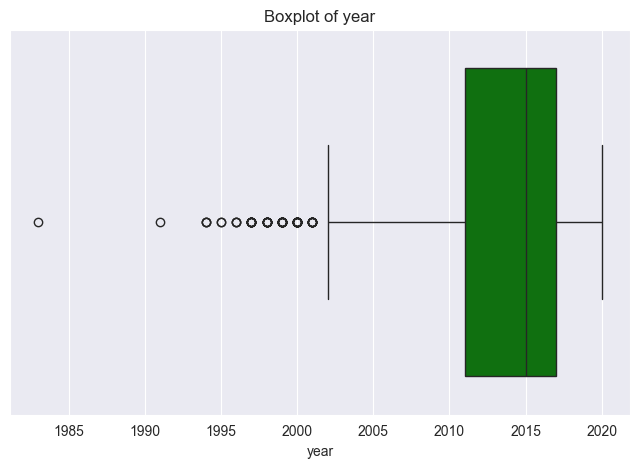

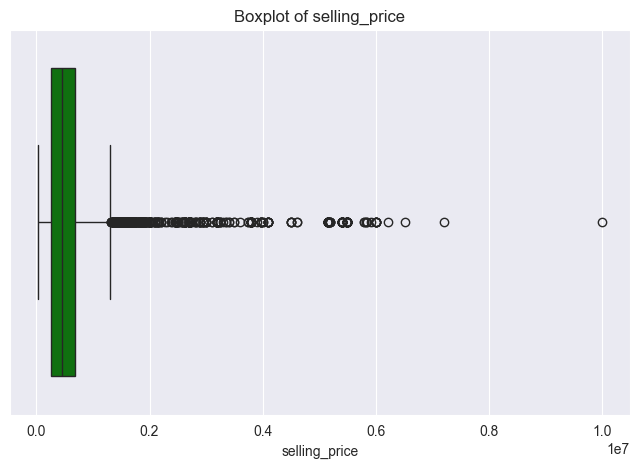

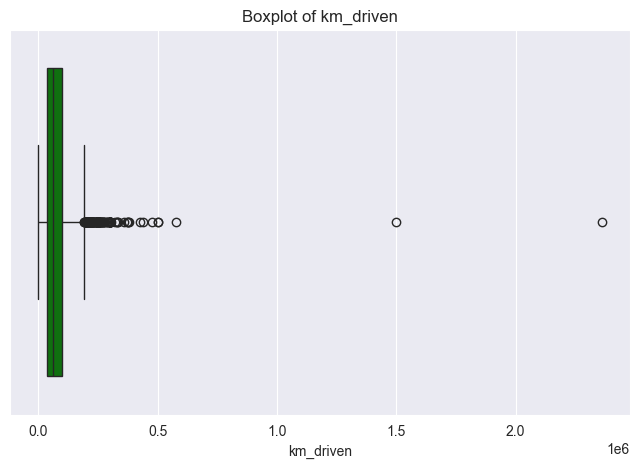

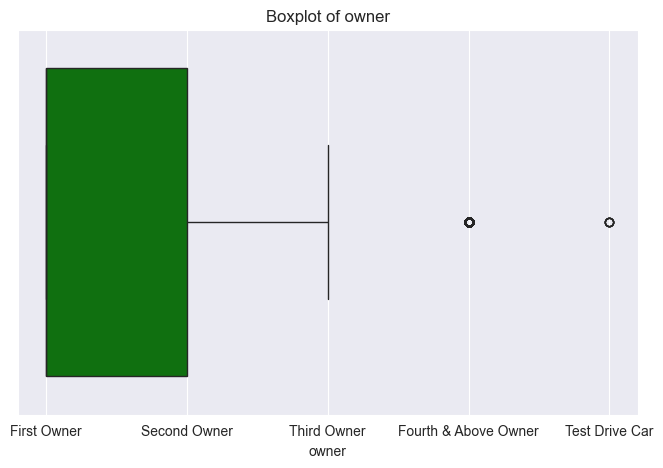

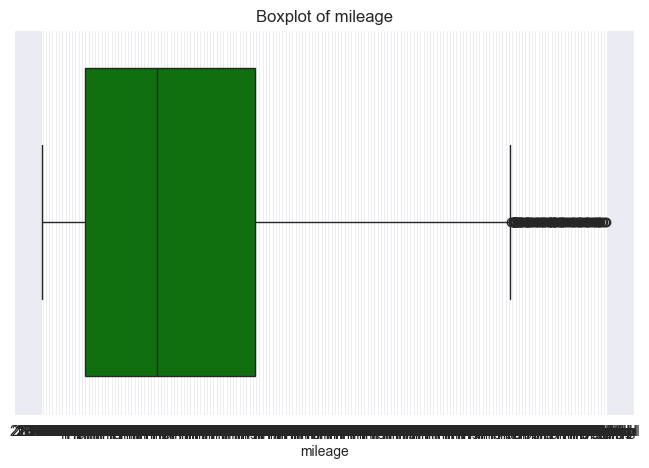

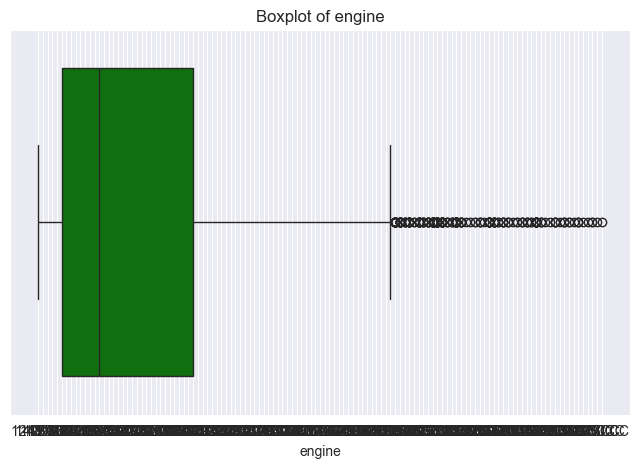

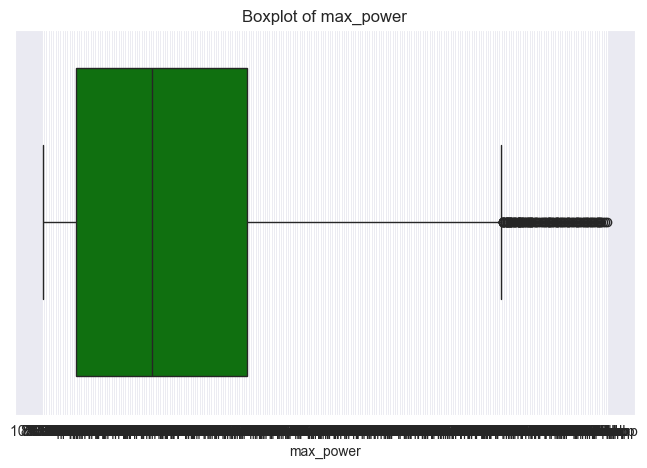

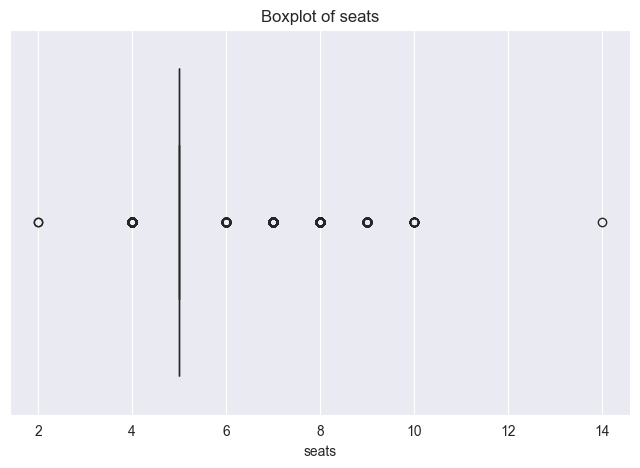

In [225]:
for col in num_col:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='green')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [33]:
for col in num_col:
    if col not in ['owner','seats']:
        Q1 = df1[col].quantile(0.25)
        Q3 = df1[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
        print(f"{col}: Number of outliers = {len(outliers)}")

year: Number of outliers = 78
selling_price: Number of outliers = 595
km_driven: Number of outliers = 168
mileage: Number of outliers = 18
engine: Number of outliers = 1183
max_power: Number of outliers = 582


In [34]:
q1 = df1['engine'].quantile(0.25)
q3 = df1['engine'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
df1[(df1['engine'] < lower_bound)| (df1['engine'] > upper_bound)]

## analysis: here high engine cc correlates with higher Max power and there higher selling price hence not considered outliers but for those with higher engine cc 
# and lower max_power we need to see correlation and dig little deep to know why this the case or is it really anomaly

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
39,Tata,Safari DICOR 2.2 LX 4x2,2011,425000,60000,Diesel,Individual,Manual,2,13.93,2179.0,138.03,7.0
47,Toyota,Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,1,12.55,2982.0,168.50,7.0
48,Toyota,Innova 2.5 G (Diesel) 7 Seater BS IV,2013,700000,99000,Diesel,Dealer,Manual,1,12.99,2494.0,100.00,7.0
51,Mitsubishi,Pajero Sport 4X4,2013,1090000,151000,Diesel,Dealer,Manual,1,13.50,2477.0,175.56,7.0
55,Toyota,Innova Crysta 2.8 ZX AT BSIV,2016,1650000,127700,Diesel,Dealer,Automatic,2,11.36,2755.0,171.50,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071,Toyota,Innova 2.5 V Diesel 7-seater,2010,425000,200000,Diesel,Individual,Manual,2,12.80,2494.0,102.00,7.0
8077,Toyota,Innova 2.5 E 7 STR,2009,550000,250000,Diesel,Individual,Manual,1,12.80,2494.0,102.00,7.0
8080,Tata,New Safari DICOR 2.2 EX 4x2,2010,300000,100000,Diesel,Individual,Manual,1,11.57,2179.0,138.10,7.0
8099,Mahindra,XUV500 W8 2WD,2013,750000,120000,Diesel,Individual,Manual,1,15.10,2179.0,140.00,7.0


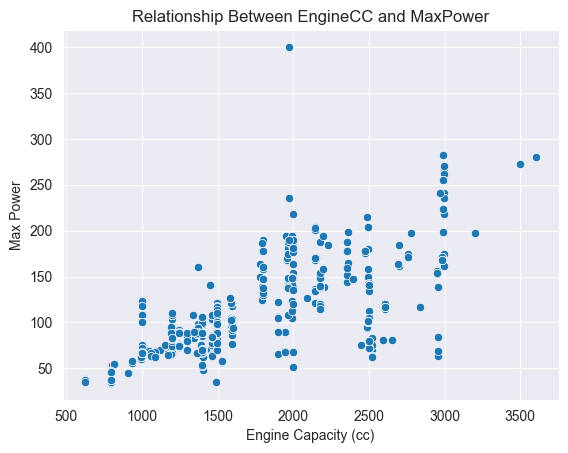

In [35]:
sns.scatterplot(x='engine', y='max_power', data=df1)
plt.title("Relationship Between EngineCC and MaxPower")
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Max Power")
plt.show()

In [36]:
df1.groupby('brand')[['engine', 'max_power']].mean().sort_values(ascending=False, by='max_power')
## domain knowledge: commercial vehicles like (mahindra bolera also a lower price brand) it seems often have large engines designed for torque rather than power. 
## older vehicle like ambassador have high capacity but lower output compared to modern turbo charged engine

,engine,max_power
brand,,
Lexus,2487.000000,214.560000
BMW,2109.406780,195.839492
Audi,2201.351351,191.313243
Jeep,2180.129032,189.747419
Mercedes-Benz,2300.796296,187.660556
Jaguar,2062.605634,182.742254
Volvo,1976.164179,175.626866
Isuzu,2699.000000,158.408000
Land,2059.000000,149.323333


In [37]:
q1 = df1['year'].quantile(0.25)
q3 = df1['year'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
df1[(df1['year'] < lower_bound)| (df1['year'] > upper_bound)] ## a lot of missing values, also due to car being old missing values may be we need to remove this 

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
7,Maruti,800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.1,796.0,37.0,4.0
177,Maruti,800 Std,1999,40000,40000,Petrol,Individual,Manual,2,16.1,796.0,37.0,4.0
186,Daewoo,Matiz SD,2000,100000,60000,Petrol,Individual,Manual,1,18.5,796.0,53.0,5.0
316,Mahindra,Willys CJ 3B 4X4,1983,300000,10000,Diesel,Individual,Manual,3,NaN,NaN,NaN,NaN
774,Hyundai,Santro GLS I - Euro I,1999,80000,110000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,Maruti,Alto LX,2000,45957,90000,Petrol,Individual,Manual,2,19.7,796.0,46.3,5.0
7996,Hyundai,Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
8025,Maruti,800 AC,1998,35000,40000,Petrol,Individual,Manual,2,16.1,796.0,37.0,4.0
8042,Maruti,Gypsy King Soft Top,1997,300000,186388,Petrol,Individual,Manual,2,14.8,1298.0,80.0,8.0


In [38]:
q1 = df1['selling_price'].quantile(0.25)
q3 = df1['selling_price'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
df1[(df1['selling_price'] < lower_bound)| (df1['selling_price'] > upper_bound)]

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
41,Jeep,Compass 1.4 Limited Plus BSIV,2019,2100000,5000,Petrol,Individual,Automatic,1,16.00,1368.0,160.77,5.0
47,Toyota,Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,1,12.55,2982.0,168.50,7.0
49,Mercedes-Benz,B Class B180,2014,1450000,27800,Diesel,Dealer,Automatic,2,14.80,2143.0,120.70,5.0
55,Toyota,Innova Crysta 2.8 ZX AT BSIV,2016,1650000,127700,Diesel,Dealer,Automatic,2,11.36,2755.0,171.50,7.0
57,Audi,A6 2.0 TDI Technology,2013,1750000,33900,Diesel,Dealer,Automatic,2,17.68,1968.0,174.33,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,Toyota,Innova 2.5 ZX Diesel 7 Seater BSIII,2015,1400000,170000,Diesel,Individual,Manual,1,12.99,2494.0,100.60,7.0
7967,BMW,3 Series 320d Sedan,2011,1500000,84925,Diesel,Individual,Automatic,1,16.07,1995.0,181.00,5.0
7973,Toyota,Innova 2.5 ZX Diesel 7 Seater BSIII,2015,1400000,170000,Diesel,Individual,Manual,1,12.99,2494.0,100.60,7.0
8058,Audi,A3 40 TFSI Premium,2017,1689999,8000,Petrol,Dealer,Automatic,1,16.60,1798.0,177.50,5.0


In [39]:
# Create an empty list to store outliers
outliers_list = []

for trans_type in df1['transmission'].unique():
    # Filter data for the current transmission type
    trans_data = df1[df1['transmission'] == trans_type]
    
    # Calculate IQR and bounds for SellingPrice
    Q1 = trans_data['selling_price'].quantile(0.25)
    Q3 = trans_data['selling_price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for the current transmission type
    outliers = trans_data[(trans_data['selling_price'] < lower_bound) | (trans_data['selling_price'] > upper_bound)]
    
    # Append the outliers to the list
    outliers_list.append(outliers)

# Combine all outliers into a single DataFrame
outliers_df = pd.concat(outliers_list)

# Display the outliers
print("Total Outliers Identified:")
print(outliers_df)
## High-end brands like toyota looks nicely priced, in lower ends like mahindra their higher end products like XUV 500 seems to priced, this doesn't look outlier 

Total Outliers Identified:
              brand                            model  year  selling_price  \
47           Toyota                  Fortuner 4x4 MT  2014        1500000   
75           Toyota                  Fortuner 4x4 MT  2015        1700000   
80           Toyota  Innova 2.5 VX (Diesel) 8 Seater  2016        1200000   
110        Mahindra            XUV500 W11 Option AWD  2019        1700000   
187          Toyota              Fortuner 4x2 Manual  2014        1750000   
...             ...                              ...   ...            ...   
4766            BMW     6 Series GT 630d Luxury Line  2018        6000000   
5258  Mercedes-Benz                S-Class S 350 CDI  2017        6000000   
6258            BMW     6 Series GT 630d Luxury Line  2018        5830000   
7596            BMW     6 Series GT 630d Luxury Line  2018        5830000   
7713  Mercedes-Benz                S-Class S 350 CDI  2017        6000000   

      km_driven    fuel seller_type transmission

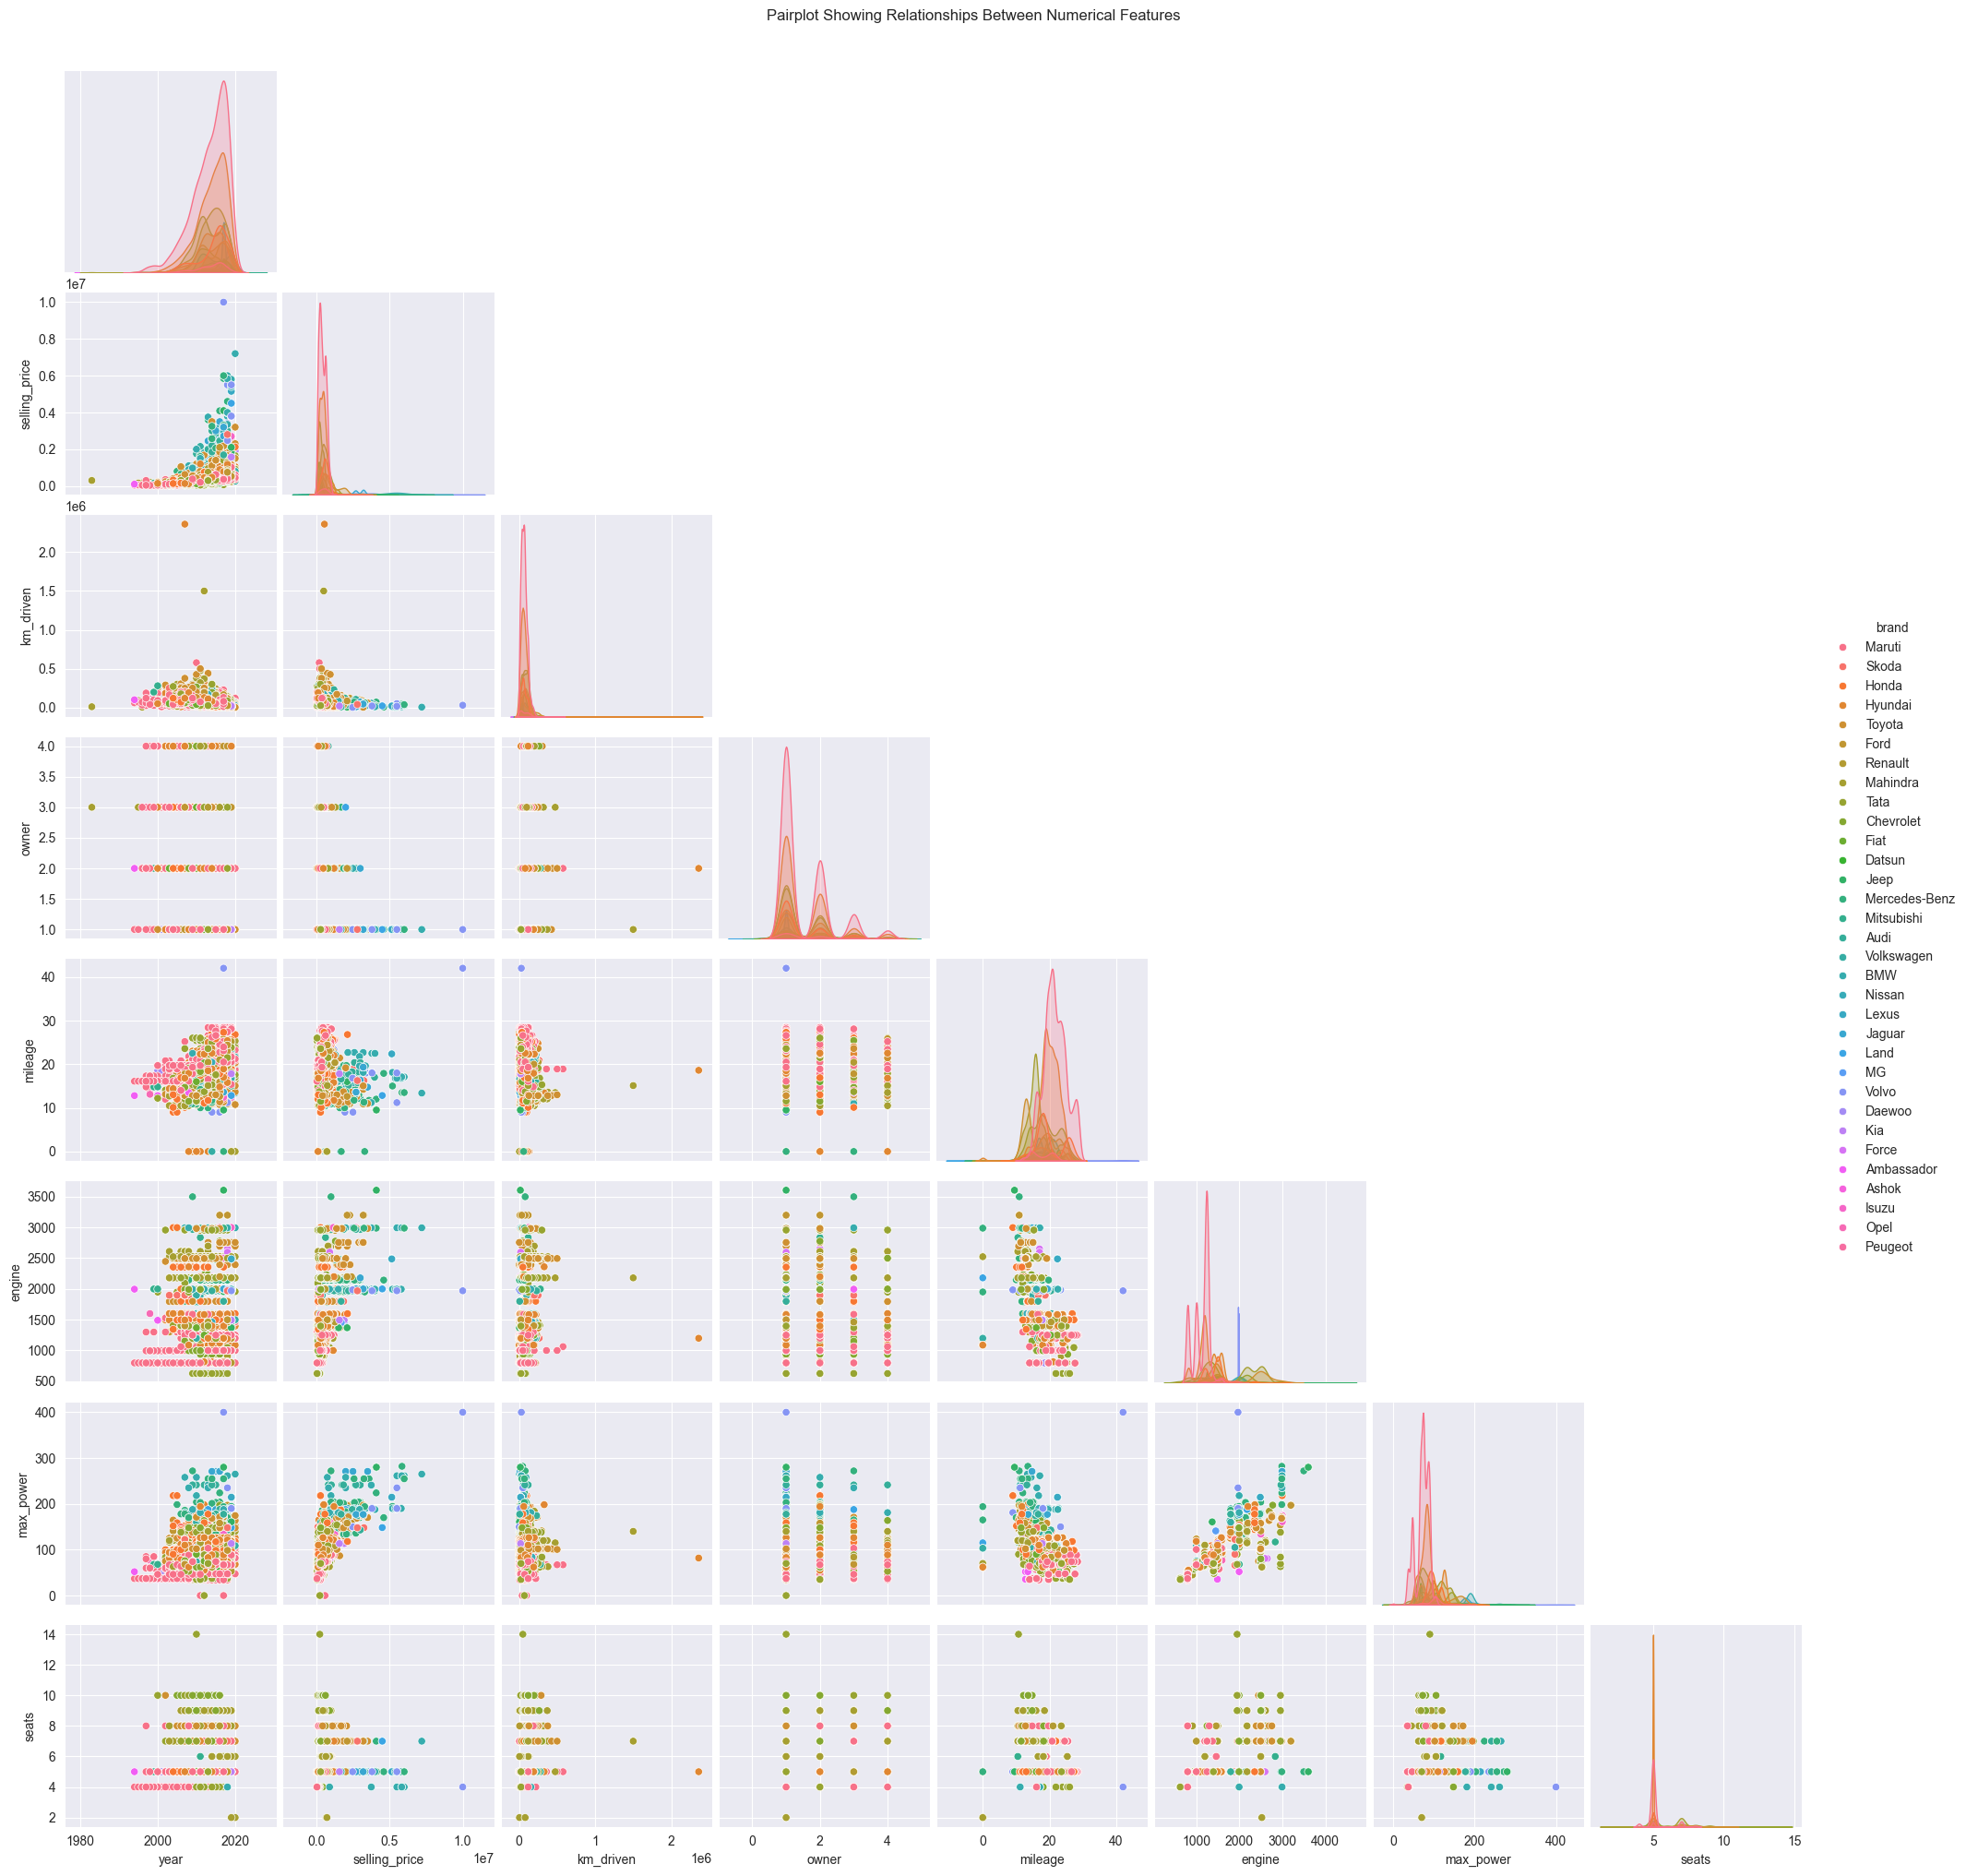

In [233]:
sns.pairplot(data = df1, vars=num_col, diag_kind='kde', corner=True, hue='brand')
plt.suptitle("Pairplot Showing Relationships Between Numerical Features", y=1.02)
plt.show()
# showing relationship and pattern of numerical features, high-ends distinctly peculiar in every chart 

In [40]:
df1.isna().sum()

brand              0
model              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

In [41]:
## handling missing values, as we know for older brands we have a lot of missing values 
## we have a missing values in engine, max_power, seats, mileage
df1[df1.isna().any(axis=1)]


,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti,Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
31,Fiat,Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
78,Tata,Indica DLS,2003,50000,70000,Diesel,Individual,Manual,1,NaN,NaN,NaN,NaN
87,Maruti,Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,1,NaN,NaN,NaN,NaN
119,Maruti,Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota,Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,1,NaN,NaN,NaN,NaN
7996,Hyundai,Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
8009,Hyundai,Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,2,NaN,NaN,NaN,NaN
8068,Ford,Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,1,NaN,NaN,NaN,NaN


In [42]:
df1[df1['brand']=='Maruti']

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
4,Maruti,Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
7,Maruti,800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,4.0
11,Maruti,Zen LX,2005,92000,100000,Petrol,Individual,Manual,2,17.30,993.0,60.00,5.0
12,Maruti,Swift Dzire VDi,2009,280000,140000,Diesel,Individual,Manual,2,19.30,1248.0,73.90,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,Maruti,Alto K10 VXI Airbag,2017,340000,45000,Petrol,Individual,Manual,1,23.95,998.0,67.10,5.0
8117,Maruti,Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,1,26.59,1248.0,74.00,5.0
8119,Maruti,Wagon R LXI Optional,2017,360000,80000,Petrol,Individual,Manual,1,20.51,998.0,67.04,5.0
8121,Maruti,Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,2,18.90,998.0,67.10,5.0


In [43]:
df1[df1.isna().any(axis=1)].groupby(['brand','year']).mean(numeric_only=True).sort_values(ascending=False, by='selling_price')

selling_price  km_driven  owner  mileage  engine  max_power  \
brand      year                                                                
Volkswagen 2011     2150000.00    50000.0    2.0      NaN     NaN        NaN   
BMW        2017     2150000.00    27000.0    1.0      NaN     NaN        NaN   
           2008      890000.00    70000.0    3.0      NaN     NaN        NaN   
Ford       2018      624000.00    14681.0    1.0      NaN     NaN        NaN   
Mahindra   2017      600000.00    60000.0    1.0      NaN     NaN        NaN   
...                        ...        ...    ...      ...     ...        ...   
Hyundai    2002       60200.00   103800.0    2.4      NaN     NaN        NaN   
Peugeot    1997       57000.00   110000.0    3.0      NaN     NaN        NaN   
Hyundai    2001       51495.75    73000.0    2.0      NaN     NaN        NaN   
Tata       2003       45000.00    70000.0    1.0      NaN     NaN        NaN   
Maruti     2003       40000.00    90000.0    2.0      NaN     NaN        NaN   

                 seats  
brand      year         
Volkswagen 2011    NaN  
BMW        2017    NaN  
           2008    NaN  
Ford       2018    NaN  
Mahindra   2017    NaN  
...                ...  
Hyundai    2002    NaN  
Peugeot    1997    NaN  
Hyundai    2001    NaN  
Tata       2003    NaN  
Maruti     2003    NaN  

[67 rows x 7 columns]

In [ ]:
## same model follow same engine, seating, max_power and engine specs so we filled value if a car has a same model
df1['model']=df1['model'].str.lower()
df1 = df1.groupby(['model']).apply(lambda group: group.fillna(method='ffill').fillna(method='bfill')).reset_index(drop=True)

In [45]:
## missing value filled with same model and now row down from 214 to 153 remaining I think we can drop remaining rows given the huge data set and examining the data set it looks safe to drop the rows 
df1.isna().sum() 

brand              0
model              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          153
engine           153
max_power        153
seats            153
dtype: int64

In [46]:
df1[(df1[num_col] == 0).any(axis=1)]
##having 0 value in features skews the data and also causes distortion in mean and standard deviation calculation thereby causing problem in standardization and causes problem in training as well 

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
380,Maruti,alto k10 lxi,2011,204999,97500,Petrol,Individual,Manual,1,20.92,998.0,0.00,5.0
381,Maruti,alto k10 lxi,2011,204999,97500,Petrol,Individual,Manual,1,20.92,998.0,0.00,5.0
1102,Mahindra,bolero pik-up cbc 1.7t,2019,722000,80000,Diesel,Individual,Manual,1,0.00,2523.0,70.00,2.0
1103,Mahindra,bolero pik-up fb 1.7t,2020,679000,5000,Diesel,Individual,Manual,1,0.00,2523.0,70.00,2.0
2870,Mercedes-Benz,glc 220d 4matic,2017,3300000,60000,Diesel,Dealer,Automatic,1,0.00,1950.0,194.00,5.0
3768,Tata,indica vista aura safire anniversary edition,2009,135000,28900,Petrol,Individual,Manual,2,0.00,1172.0,65.00,5.0
3772,Tata,indica vista quadrajet ls,2012,240000,70000,Diesel,Individual,Manual,1,22.30,1248.0,0.00,5.0
3773,Tata,indica vista quadrajet ls,2012,240000,70000,Diesel,Individual,Manual,1,22.30,1248.0,0.00,5.0
4489,Mercedes-Benz,m-class ml 350 4matic,2011,1700000,110000,Diesel,Individual,Automatic,3,0.00,2987.0,165.00,5.0
4490,Mercedes-Benz,m-class ml 350 4matic,2011,1700000,110000,Diesel,Individual,Automatic,3,0.00,2987.0,165.00,5.0


In [47]:
df1[df1['model'].str.contains('alto', na=False)]
## checking the dataset to see if similar model have some values with 0 

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
204,Maruti,alto 800 base,2014,185000,10300,Petrol,Individual,Manual,1,22.74,796.0,47.3,5.0
205,Maruti,alto 800 base,2016,220000,40000,Petrol,Individual,Manual,1,22.74,796.0,47.3,5.0
206,Maruti,alto 800 base,2015,210000,50000,Petrol,Individual,Manual,2,22.74,796.0,47.3,5.0
207,Maruti,alto 800 base,2015,170000,20000,Petrol,Individual,Manual,3,22.74,796.0,47.3,5.0
208,Maruti,alto 800 lx,2015,280000,28000,Petrol,Individual,Manual,2,22.74,796.0,47.3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Maruti,alto std,2008,129000,60000,Petrol,Individual,Manual,1,19.70,796.0,46.3,5.0
3139,MG,hector sharp dct dualtone,2020,1900000,1600,Petrol,Dealer,Automatic,1,13.96,1451.0,141.0,5.0
4721,Tata,nexon 1.5 revotorq xza plus dualtone,2018,1025000,8000,Diesel,Dealer,Automatic,1,21.50,1497.0,108.5,5.0
4722,Tata,nexon 1.5 revotorq xza plus dualtone,2018,950000,40000,Diesel,Individual,Automatic,1,21.50,1497.0,108.5,5.0


In [ ]:
## converting 0 values to nan and then using same procedure as above to fill in with same value according to same model
df1[num_col] = df1[num_col].replace(0, pd.NA)
df1 = df1.groupby('model').apply(lambda group: group.fillna(method='ffill').fillna(method='bfill')).reset_index(drop=True)
df1[(df1[num_col] == 0).any(axis=1)]

In [49]:
df1[df1.isna().any(axis=1)]

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
19,Peugeot,309 gld,1997,57000,110000,Diesel,Individual,Manual,3,NaN,NaN,NaN,NaN
25,BMW,5 series 520d sedan,2008,890000,70000,Diesel,Individual,Automatic,3,NaN,NaN,NaN,NaN
194,Hyundai,accent gvs,2003,70000,120000,Petrol,Individual,Manual,3,NaN,NaN,NaN,NaN
1097,Mahindra,bolero glx,2004,250000,80000,Diesel,Individual,Manual,3,NaN,NaN,NaN,NaN
1098,Mahindra,bolero glx,2006,200000,120000,Diesel,Individual,Manual,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,Mahindra,willys cj 3b 4x4,1983,300000,10000,Diesel,Individual,Manual,3,NaN,NaN,NaN,NaN
7441,BMW,x1 sdrive 20d xline,2017,2150000,27000,Diesel,Dealer,Automatic,1,NaN,NaN,NaN,NaN
7908,Mahindra,xylo e8 bs4,2010,300000,40000,Diesel,Individual,Manual,1,NaN,NaN,NaN,NaN
7957,Maruti,zen estilo vxi bsiv w abs,2011,170000,55113,Petrol,Individual,Manual,1,NaN,NaN,NaN,NaN


In [50]:
df1.dropna(inplace=True)

In [51]:
df1.isna().sum()

brand            0
model            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [267]:
df1[df1['brand']=='BMW'] 
## on checking this we see a lot of duplicated rows with exactly same values this is not right, first this may look like car with same specs from different dealer but kms driven is also same, so this is a legit duplicate oh yeah...!! this might mean over representation of some models and brands in our data sets

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,BMW,3 series 320d,2017,3200000,13663,Diesel,Dealer,Automatic,1,22.69,1995.0,190.00,5.0
1,BMW,3 series 320d corporate edition,2012,900000,155000,Diesel,Individual,Automatic,2,16.07,1995.0,181.00,4.0
2,BMW,3 series 320d gt luxury line,2017,2950000,39000,Diesel,Dealer,Automatic,1,19.59,1995.0,187.74,5.0
3,BMW,3 series 320d gt luxury line,2017,2950000,39000,Diesel,Dealer,Automatic,1,19.59,1995.0,187.74,5.0
4,BMW,3 series 320d highline,2009,1100000,60000,Diesel,Individual,Automatic,2,16.07,1995.0,181.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7513,BMW,x4 m sport x xdrive20d,2019,5500000,8500,Diesel,Dealer,Automatic,1,16.78,1995.0,190.00,5.0
7514,BMW,x5 3.0d,2008,830000,60000,Diesel,Individual,Automatic,3,11.00,2993.0,235.00,5.0
7515,BMW,x6 xdrive30d,2013,3750000,56000,Diesel,Dealer,Automatic,1,11.20,2993.0,241.00,4.0
7516,BMW,x6 xdrive30d,2013,3750000,56000,Diesel,Dealer,Automatic,1,11.20,2993.0,241.00,4.0


In [52]:
df1['brand'].value_counts()

brand
Maruti           2337
Hyundai          1334
Mahindra          756
Tata              719
Toyota            475
Honda             465
Ford              388
Chevrolet         228
Renault           228
Volkswagen        182
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      51
Fiat               41
Audi               37
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                5
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: count, dtype: int64

In [53]:
df1[df1.duplicated(keep=False)]

,brand,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2,BMW,3 series 320d gt luxury line,2017,2950000,39000,Diesel,Dealer,Automatic,1,19.59,1995.0,187.74,5.0
3,BMW,3 series 320d gt luxury line,2017,2950000,39000,Diesel,Dealer,Automatic,1,19.59,1995.0,187.74,5.0
6,BMW,3 series 320d luxury line,2016,2150000,30000,Diesel,Dealer,Automatic,1,22.69,1995.0,190.00,5.0
7,BMW,3 series 320d luxury line,2012,1300000,140000,Diesel,Individual,Automatic,2,18.88,1995.0,184.00,5.0
8,BMW,3 series 320d luxury line,2012,1300000,140000,Diesel,Individual,Automatic,2,18.88,1995.0,184.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7951,Maruti,zen estilo vxi bsiii,2007,160000,74800,Petrol,Individual,Manual,2,18.20,998.0,67.10,5.0
8009,Tata,zest revotron 1.2 xt,2020,500000,40000,Petrol,Individual,Manual,1,17.57,1193.0,88.70,5.0
8010,Tata,zest revotron 1.2 xt,2020,500000,40000,Petrol,Individual,Manual,1,17.57,1193.0,88.70,5.0
8013,Tata,zest revotron 1.2 xt,2020,500000,40000,Petrol,Individual,Manual,1,17.57,1193.0,88.70,5.0


In [54]:
## dropping duplicated value 
df1 = df1.drop_duplicates()

In [56]:
df1.duplicated().sum()

np.int64(0)

In [66]:
## checking whether to create a new feature and dropping model
list_of_words = ['luxury','gt', 'sport','premium','highline']
for m in list_of_words:
    sp = df1[df1['model'].str.contains(m, case=False)]['selling_price'].mean()
    print(f"{m}: {sp}")

luxury: 3369473.6842105263
gt: 1360137.9310344828
sport: 708544.931880109
premium: 1922458.1666666667
highline: 511444.43333333335


In [80]:
final_data = df1.drop(columns=['model'])

In [85]:
final_data

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,BMW,2017,3200000,13663,Diesel,Dealer,Automatic,1,22.69,1995.0,190.00,5.0
1,BMW,2012,900000,155000,Diesel,Individual,Automatic,2,16.07,1995.0,181.00,4.0
2,BMW,2017,2950000,39000,Diesel,Dealer,Automatic,1,19.59,1995.0,187.74,5.0
4,BMW,2009,1100000,60000,Diesel,Individual,Automatic,2,16.07,1995.0,181.00,5.0
5,BMW,2012,1100000,80000,Diesel,Individual,Automatic,2,16.07,1995.0,181.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Tata,2018,459999,35000,Petrol,Individual,Manual,1,17.57,1193.0,88.70,5.0
8024,Tata,2017,400000,53000,Petrol,Individual,Manual,1,17.57,1193.0,88.70,5.0
8025,Tata,2015,450000,40000,Petrol,Individual,Manual,1,17.57,1193.0,88.70,5.0
8026,Tata,2015,500000,20000,Petrol,Individual,Manual,1,17.57,1193.0,88.70,5.0


In [266]:
final_data.groupby('fuel').mean('selling_price')

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
fuel,,,,,,,,
Diesel,2013.763,642720.838,88628.927,1.511,19.818,1668.212,96.980,5.755
Petrol,2013.368,377158.805,55094.065,1.485,19.121,1141.339,76.558,5.055


In [285]:
final_data = final_data.query("km_driven <= 500000")

In [287]:
final_data

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,BMW,2017,3200000,13663,Diesel,Dealer,Automatic,1,22.690,1995.000,190.000,5.000
1,BMW,2012,900000,155000,Diesel,Individual,Automatic,2,16.070,1995.000,181.000,4.000
2,BMW,2017,2950000,39000,Diesel,Dealer,Automatic,1,19.590,1995.000,187.740,5.000
4,BMW,2009,1100000,60000,Diesel,Individual,Automatic,2,16.070,1995.000,181.000,5.000
5,BMW,2012,1100000,80000,Diesel,Individual,Automatic,2,16.070,1995.000,181.000,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...
8023,Tata,2018,459999,35000,Petrol,Individual,Manual,1,17.570,1193.000,88.700,5.000
8024,Tata,2017,400000,53000,Petrol,Individual,Manual,1,17.570,1193.000,88.700,5.000
8025,Tata,2015,450000,40000,Petrol,Individual,Manual,1,17.570,1193.000,88.700,5.000
8026,Tata,2015,500000,20000,Petrol,Individual,Manual,1,17.570,1193.000,88.700,5.000


In [289]:
X, y = final_data.loc[:, final_data.columns != 'selling_price'], final_data['selling_price']

In [290]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

## Pipeline 

In [293]:
# Log-transform the target
def log_transform(y):
    return np.log1p(y)  # Log-transform (handles zeros)

# Inverse log-transform
def inverse_log_transform(y_log):
    return np.expm1(y_log)  # Inverse log-transform

ytrain_log = log_transform(ytrain)

##Target encoding 
brand_means = Xtrain.join(ytrain).groupby('brand')['selling_price'].mean()

Xtrain['brand_encoded'] = Xtrain['brand'].map(brand_means)
Xtest['brand_encoded'] = Xtest['brand'].map(brand_means)

Xtest['brand_encoded'] = Xtest['brand_encoded'].fillna(brand_means.mean())

##Drop the brand column
Xtrain = Xtrain.drop(columns=['brand'])
Xtest = Xtest.drop(columns=['brand'])



## Defining columns for transformation
final_cat_col = ['fuel', 'seller_type','transmission']
final_num_col = ['km_driven','mileage','engine','max_power', 'year','seats','owner']


## Preprocessing for scaling and encoding
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(transformers=[('num', scaler, final_num_col),('cat', ohe,final_cat_col)], remainder='passthrough')


#Applying transformation and define pipeline
def build_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

## Random Forest Regressor

In [232]:
rf_params = {'model__n_estimators': [100, 200, 300,400,500],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]}

scoring = {'mae':'neg_mean_squared_error', 'r2':'r2'}


## Defining pipeline for both the model

rf_pipeline = build_pipeline(RandomForestRegressor())
rf_search = RandomizedSearchCV(rf_pipeline, rf_params, cv=5, n_iter=100, scoring=scoring, random_state=42, n_jobs=-1, refit='mae')
rf_search.fit(Xtrain, ytrain_log)
best_pipeline = rf_search.best_estimator_

y_pred_log = best_pipeline.predict(Xtest)
y_pred = inverse_log_transform(y_pred_log)
r2 = r2_score(ytest, y_pred)

print("Best parameters:", rf_search.best_params_)
print("Best Mae:", rf_search.best_score_)
print(f"R2 Score: {r2:4f}")



Best parameters: {'model__n_estimators': 300, 'model__min_samples_split': 10, 'model__min_samples_leaf': 1, 'model__max_depth': 20, 'model__bootstrap': True}
Best Mae: -0.04668516072984039
R2 Score: 0.923988


In [ ]:
results = rf_search.cv_results_

# Get mean test MAE and R² scores
mean_mae_scores = results['mean_test_mae']
mean_r2_scores = results['mean_test_r2']

# Display the best score and corresponding parameters
print("Mean CV MAE scores:", mean_mae_scores)
print("Mean CV R² scores:", mean_r2_scores)

In [234]:
cv_results_df = pd.DataFrame(results)
cv_results_df[['mean_test_mae','mean_test_r2']]

,mean_test_mae,mean_test_r2
0,-0.067,0.877
1,-0.051,0.907
2,-0.075,0.863
3,-0.068,0.876
4,-0.049,0.912
...,...,...
145,-0.050,0.909
146,-0.049,0.911
147,-0.075,0.863
148,-0.049,0.911


In [233]:
rf_feat_imp = best_pipeline.named_steps['model'].feature_importances_
rf_feat_imp

array([1.87091381e-02, 2.09512024e-02, 1.04324048e-01, 2.94954334e-01,
       4.77265761e-01, 1.30229640e-02, 5.20143606e-03, 1.08012906e-03,
       1.07054700e-03, 5.48492449e-04, 4.48973633e-04, 5.55162292e-06,
       5.17654318e-04, 5.21211452e-04, 6.13785561e-02])

## Gradient Boosting

In [232]:

## ensemble algo --> trying boosting, generally it performs better in tabular data with medium to big non-linear data
gb_params = {
    'model__n_estimators': [100, 200, 300,400,500],
    'model__max_depth': [3, 5, 7,9],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__min_samples_split':[4,6,8,10],
    'model__min_samples_leaf': [1, 2, 4, 6, 8],
    'model__max_features': ['sqrt', 'log2', None]}

gb_pipeline = build_pipeline(GradientBoostingRegressor())
gb_search = RandomizedSearchCV(gb_pipeline, gb_params, cv=5, n_iter=100, scoring=scoring, random_state=42, n_jobs=-1, refit='mae', error_score='raise')
gb_search.fit(Xtrain, ytrain_log)

best_pipeline_gb = gb_search.best_estimator_
y_pred_log_gb = best_pipeline_gb.predict(Xtest)
y_pred_gb = inverse_log_transform(y_pred_log_gb)
r2 = r2_score(ytest, y_pred_gb)

print("Best parameters:", gb_search.best_params_)
print("Best Mae:", gb_search.best_score_)
print(f"R2 Score: {r2:4f}")



## Testing the model with user input data

In [292]:

## testing the model by user given input

val = np.array(['Jaguar',2014,5000,'Diseal','Individual','Automatic',1,15,2200,150,5])
# Convert input to a DataFrame
columns = ['brand', 'year', 'km_driven', 'fuel', 'seller_type',
           'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']
val = pd.DataFrame([val], columns=columns)

val['brand_encoded'] = val['brand'].map(brand_means)
if val['brand_encoded'].isnull().any():
    val['brand_encoded'] = val['brand_encoded'].fillna(brand_means.mean())

val = val.drop(columns=['brand'])

inverse_log_transform(best_pipeline.predict(val))

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df1[df1['brand']=='Jaguar']


## Linear Regression (Ridge, Lasso, Elastic Net)

In [299]:
ridge_params = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
}

# Build pipeline
ridge_pipeline = build_pipeline(Ridge())

# RandomizedSearchCV for Ridge Regression
ridge_search = RandomizedSearchCV(
    ridge_pipeline, ridge_params, cv=5, n_iter=5, scoring=scoring, 
    random_state=42, n_jobs=-1, refit='mae', error_score='raise'
)

# Fit the Ridge model
ridge_search.fit(Xtrain, ytrain_log)

# Get the best pipeline
best_pipeline_ridge = ridge_search.best_estimator_

# Make predictions
y_pred_log_ridge = best_pipeline_ridge.predict(Xtest)
y_pred_ridge = inverse_log_transform(y_pred_log_ridge)

# Evaluate the model
r2_ridge = r2_score(ytest, y_pred_ridge)
mae_ridge = mean_absolute_error(ytest, y_pred_ridge)

print("Are there NaNs in predictions?", np.isnan(y_pred_ridge).any())
print("Are there infinite values in predictions?", np.isinf(y_pred_ridge).any())

# Print results
print("Best parameters for Ridge:", ridge_search.best_params_)
print("Best MAE for Ridge:", mae_ridge)
print(f"R2 Score for Ridge: {r2_ridge:4f}")

/Users/binit/PycharmProjects/ML_AIT_A1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.22596e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/binit/PycharmProjects/ML_AIT_A1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.01562e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Predictions: [218153.81429688 679832.37639254 759455.33512455 ... 602899.8702014
 215323.13100205 249604.70159911]
Are there NaNs in predictions? False
Are there infinite values in predictions? False
Best parameters for Ridge: {'model__alpha': 1.0}
Best MAE for Ridge: 109754.2603769234
R2 Score for Ridge: 0.792895


/Users/binit/PycharmProjects/ML_AIT_A1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.93799e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/binit/PycharmProjects/ML_AIT_A1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.89988e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/binit/PycharmProjects/ML_AIT_A1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.07359e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [301]:
## this linear model can't handle outliers, and we have many cars that have a peculiar characteristics like luxury or gt-line which are sort of outlier. This is due of loss function being used usually mean squared error or mse during training.
lasso_params = {
    'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Regularization strength
}

# Build pipeline
lasso_pipeline = build_pipeline(Lasso())

# RandomizedSearchCV for Lasso Regression
lasso_search = RandomizedSearchCV(
    lasso_pipeline, lasso_params, cv=5, n_iter=5, scoring=scoring, 
    random_state=42, n_jobs=-1, refit='mae', error_score='raise'
)

# Fit the Lasso model
lasso_search.fit(Xtrain, ytrain_log)

# Get the best pipeline
best_pipeline_lasso = lasso_search.best_estimator_

# Make predictions
y_pred_log_lasso = best_pipeline_lasso.predict(Xtest)
y_pred_lasso = inverse_log_transform(y_pred_log_lasso)

# Evaluate the model
r2_lasso = r2_score(ytest, y_pred_lasso)
mae_lasso = mean_absolute_error(ytest, y_pred_lasso)

# Print results
print("Best parameters for Lasso:", lasso_search.best_params_)
print("Best MAE for Lasso:", mae_lasso)
print(f"R2 Score for Lasso: {r2_lasso:4f}")


## Model difference 

1. Nature of the Models

Ridge and Lasso Regression
	Linear Models:
	•	Ridge and Lasso are linear regression models that assume a linear relationship between the predictors (features) and the target variable.
	•	If the relationship between the features and target is non-linear, Ridge and Lasso may struggle to capture the underlying patterns, leading to lower performance.
	Feature Importance:
	•	Ridge handles multi-collinearity well by penalizing large coefficients, spreading importance across all features.
	•	Lasso performs feature selection by shrinking some coefficients to zero, effectively removing irrelevant features. This can hurt performance if all features contribute to the prediction.

Random Forest & Gradient Boosting
	Non-Linear Model:
	•	Random Forest is a non-linear, tree-based ensemble model that can handle complex relationships between features and the target variable.
	•	It splits the data into regions (decision boundaries) and makes predictions based on these splits. It doesn’t rely on the linearity assumption.
	Feature Interactions:
	•	Random Forest can capture interactions between features automatically, something linear models like Ridge and Lasso cannot do directly.
	•	Robust to Outliers and Non-Linearity:
	•	Tree-based models are robust to outliers and non-linear relationships in the data, making them more suitable for real-world datasets with such characteristics.
	
2.  Dataset Characteristics

The nature of the dataset can significantly impact model performance:

Feature Relationships
	•	Where ever the features and target variable have non-linear relationships, Random Forest will naturally outperform Ridge and Lasso, as linear models cannot capture non-linear patterns.

Feature Importance
	•	Random Forest assigns varying levels of importance to features and handles irrelevant features better.
	•	Lasso may under perform if it removes features that actually contribute to the target (due to the regularization penalty).


Also, Random Forest and GB model uses ensemble techniques meaning it uses not just one algorithms but uses same algorithms many times or different types of algorithms to better learn the pattern of data. Like a Random Forest is made up of several decision trees and then they are combined. Boosting techniques uses one output of a model as a next input for another model thereby enhancing model's performance

## Saving the Model

In [250]:
##Randomforest model saved
joblib.dump(rf_search.best_estimator_,'random_forest_model.pkl')

##Like wise gradient boosting 
joblib.dump(gb_search.best_estimator_,'gradient_boost_model.pkl')

## brand mean encoding
joblib.dump(brand_means, 'brand_means.pkl' )


['brand_means.pkl']